In [3]:
install.packages("recommenderlab")

Installing package into 'C:/Users/SONY/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'recommenderlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\SONY\AppData\Local\Temp\RtmpshUJEf\downloaded_packages


In [4]:
library(recommenderlab)
library(ggplot2)
library(data.table)
library(reshape2)

Warning message:
"package 'recommenderlab' was built under R version 4.0.5"
Loading required package: Matrix

Loading required package: arules

Warning message:
"package 'arules' was built under R version 4.0.4"

Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write


Loading required package: proxy

Warning message:
"package 'proxy' was built under R version 4.0.4"

Attaching package: 'proxy'


The following object is masked from 'package:Matrix':

    as.matrix


The following objects are masked from 'package:stats':

    as.dist, dist


The following object is masked from 'package:base':

    as.matrix


Loading required package: registry

Warning message:
"package 'registry' was built under R version 4.0.3"
Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy


Attaching package: 'reshape2'


The following objects are masked from 'package:data.tabl

In [5]:
setwd("C:/Users/SONY/Documents/R Projects/Movie Data")

In [6]:
movie_data <- read.csv("movies.csv", stringsAsFactors=FALSE)
rating_data <- read.csv("ratings.csv")

In [7]:
str(movie_data)

'data.frame':	10329 obs. of  3 variables:
 $ movieId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ title  : chr  "Toy Story (1995)" "Jumanji (1995)" "Grumpier Old Men (1995)" "Waiting to Exhale (1995)" ...
 $ genres : chr  "Adventure|Animation|Children|Comedy|Fantasy" "Adventure|Children|Fantasy" "Comedy|Romance" "Comedy|Drama|Romance" ...


In [8]:
summary(movie_data)

    movieId          title              genres         
 Min.   :     1   Length:10329       Length:10329      
 1st Qu.:  3240   Class :character   Class :character  
 Median :  7088   Mode  :character   Mode  :character  
 Mean   : 31924                                        
 3rd Qu.: 59900                                        
 Max.   :149532                                        

In [9]:
head(movie_data)

,movieId,title,genres
,<int>,<chr>,<chr>
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,5,Father of the Bride Part II (1995),Comedy
6,6,Heat (1995),Action|Crime|Thriller


In [10]:
summary(rating_data)

     userId         movieId           rating        timestamp        
 Min.   :  1.0   Min.   :     1   Min.   :0.500   Min.   :8.286e+08  
 1st Qu.:192.0   1st Qu.:  1073   1st Qu.:3.000   1st Qu.:9.711e+08  
 Median :383.0   Median :  2497   Median :3.500   Median :1.115e+09  
 Mean   :364.9   Mean   : 13381   Mean   :3.517   Mean   :1.130e+09  
 3rd Qu.:557.0   3rd Qu.:  5991   3rd Qu.:4.000   3rd Qu.:1.275e+09  
 Max.   :668.0   Max.   :149532   Max.   :5.000   Max.   :1.452e+09  

In [11]:
head(rating_data)

,userId,movieId,rating,timestamp
,<int>,<int>,<dbl>,<int>
1,1,16,4.0,1217897793
2,1,24,1.5,1217895807
3,1,32,4.0,1217896246
4,1,47,4.0,1217896556
5,1,50,4.0,1217896523
6,1,110,4.0,1217896150


In [12]:
movie_genre <- as.data.frame(movie_data$genres, stringsAsFactors=FALSE)
library(data.table)
movie_genre2 <- as.data.frame(tstrsplit(movie_genre[,1], '[|]', 
                                   type.convert=TRUE), 
                              
                         stringsAsFactors=FALSE)
colnames(movie_genre2) <- c(1:10)

list_genre <- c("Action", "Adventure", "Animation", "Children", 
                "Comedy", "Crime","Documentary", "Drama", "Fantasy",
                "Film-Noir", "Horror", "Musical", "Mystery","Romance",
                "Sci-Fi", "Thriller", "War", "Western")
genre_mat1 <- matrix(0,10330,18)
genre_mat1[1,] <- list_genre
colnames(genre_mat1) <- list_genre

for (index in 1:nrow(movie_genre2)) {
  for (col in 1:ncol(movie_genre2)) {
    gen_col = which(genre_mat1[1,] == movie_genre2[index,col])
    genre_mat1[index+1,gen_col] <- 1
}
}
genre_mat2 <- as.data.frame(genre_mat1[-1,], stringsAsFactors=FALSE) #remove first row, which was the genre list
for (col in 1:ncol(genre_mat2)) {
  genre_mat2[,col] <- as.integer(genre_mat2[,col]) #convert from characters to integers
} 
str(genre_mat2)

'data.frame':	10329 obs. of  18 variables:
 $ Action     : int  0 0 0 0 0 1 0 0 1 1 ...
 $ Adventure  : int  1 1 0 0 0 0 0 1 0 1 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Children   : int  1 1 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 1 1 1 0 1 0 0 0 ...
 $ Crime      : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 0 0 0 0 0 0 ...
 $ Fantasy    : int  1 1 0 0 0 0 0 0 0 0 ...
 $ Film-Noir  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 1 1 0 0 1 0 0 0 ...
 $ Sci-Fi     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Thriller   : int  0 0 0 0 0 1 0 0 0 1 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Western    : int  0 0 0 0 0 0 0 0 0 0 ...


In [13]:
SearchMatrix <- cbind(movie_data[,1:2], genre_mat2[])
head(SearchMatrix)

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,Heat (1995),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
ratingMatrix <- dcast(rating_data, userId~movieId, value.var = "rating", na.rm=FALSE)

In [15]:
head(ratingMatrix)

,userId,1,2,3,4,5,6,7,8,9,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,5,NA,2,NA,3,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,NA,NA,NA,NA,3,NA,3,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,5,4,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [16]:
ratingMatrix <- as.matrix(ratingMatrix[,-1]) #remove userIds

In [17]:
head(ratingMatrix)

1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,2,NA,3,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,3,NA,3,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [18]:
#Convert rating matrix into a recommenderlab sparse matrix
ratingMatrix <- as(ratingMatrix, "realRatingMatrix")
ratingMatrix

668 x 10325 rating matrix of class 'realRatingMatrix' with 105339 ratings.

In [19]:
#some important parameters that provide us options for building recommendation systems for movies
recommendation_model <- recommenderRegistry$get_entries(dataType = "realRatingMatrix")
names(recommendation_model)

[1] "HYBRID_realRatingMatrix"       "ALS_realRatingMatrix"         
 [3] "ALS_implicit_realRatingMatrix" "IBCF_realRatingMatrix"        
 [5] "LIBMF_realRatingMatrix"        "POPULAR_realRatingMatrix"     
 [7] "RANDOM_realRatingMatrix"       "RERECOMMEND_realRatingMatrix" 
 [9] "SVD_realRatingMatrix"          "SVDF_realRatingMatrix"        
[11] "UBCF_realRatingMatrix"

In [20]:
lapply(recommendation_model, "[[", "description")

$HYBRID_realRatingMatrix
[1] "Hybrid recommender that aggegates several recommendation strategies using weighted averages."

$ALS_realRatingMatrix
[1] "Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm."

$ALS_implicit_realRatingMatrix
[1] "Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm."

$IBCF_realRatingMatrix
[1] "Recommender based on item-based collaborative filtering."

$LIBMF_realRatingMatrix
[1] "Matrix factorization with LIBMF via package recosystem (https://cran.r-project.org/web/packages/recosystem/vignettes/introduction.html)."

$POPULAR_realRatingMatrix
[1] "Recommender based on item popularity."

$RANDOM_realRatingMatrix
[1] "Produce random recommendations (real ratings)."

$RERECOMMEND_realRatingMatrix
[1] "Re-recommends highly rated items (real ratings)."

$SVD_realRatingMatrix
[1] "Recommender based on SVD approximation with column-mean imputation."

$SVDF_realRatingMatrix
[1] "Recommender based on Funk SVD with gradient descend (https://sifter.org/~simon/journal/20061211.html)."

$UBCF_realRatingMatrix
[1] "Recommender based on user-based collaborative filtering."

In [21]:
#recommendation model parameters for a single model (item-based collaboative filtering)
recommendation_model$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

In [22]:
#In collaborative filtering, movies are suggested to a user based on the preferences of other users. 
#Recommending movie is dependent on creating a relationship of similarity between two users. Operators such as 
#cosine, pearson, jaccard are used to compute similarities with the help of recommender lab.

In [23]:
similarity_mat <- similarity(ratingMatrix[1:4, ],
                               method = "cosine",
                               which = "users")
as.matrix(similarity_mat)

,1,2,3,4
1,0.0000000,0.9760860,0.9641723,0.9914398
2,0.9760860,0.0000000,0.9925732,0.9374253
3,0.9641723,0.9925732,0.0000000,0.9888968
4,0.9914398,0.9374253,0.9888968,0.0000000


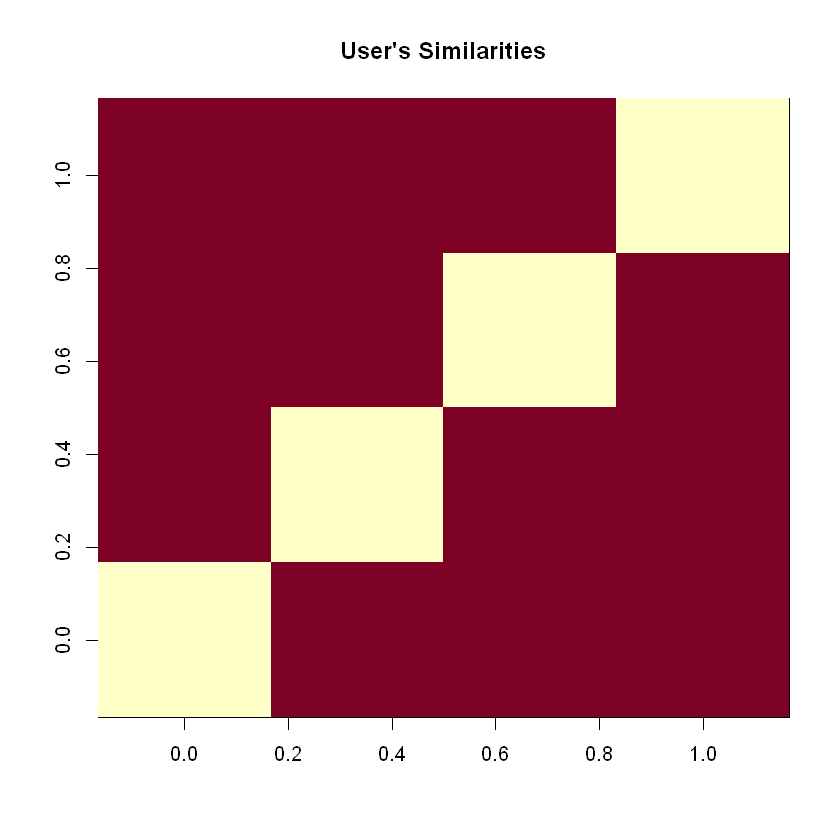

In [24]:
image(as.matrix(similarity_mat), main = "User's Similarities")

In [25]:
rating_values <- as.vector(ratingMatrix@data)
unique(rating_values) # extracting unique ratings

[1] 0.0 5.0 4.0 3.0 4.5 1.5 2.0 3.5 1.0 2.5 0.5

In [26]:
Table_of_Ratings <- table(rating_values) # creating a count of movie ratings
Table_of_Ratings

rating_values
      0     0.5       1     1.5       2     2.5       3     3.5       4     4.5 
6791761    1198    3258    1567    7943    5484   21729   12237   28880    8187 
      5 
  14856 

In [27]:
#Exploring the most viewed movies
library(ggplot2)

In [28]:
#count views for each movie
movie_views <- colCounts(ratingMatrix) 
movie_views

1      2      3      4      5      6      7      8      9     10     11 
   232     92     58     11     62    115     55      3     23    135     85 
    12     13     14     15     16     17     18     19     20     21     22 
    20      8     25     18     84    100     21     91     16    108     42 
    23     24     25     26     27     28     29     30     31     32     33 
    24     38     87     14      5     14     45     10     44    207      1 
    34     35     36     39     40     41     42     43     44     45     46 
   129      3     90     98      6     19     13     11     53     36     12 
    47     48     49     50     52     53     54     55     57     58     59 
   196     56      2    228     37      2      4      4      9     47      3 
    60     61     62     63     64     65     66     68     69     70     71 
    22      8     91     18      7     26     20      4     16     66      6 
    72     73     74     75     76     78     79     80     81     82     83 
     2     10     15      2     20     10     22      3     21     10      5 
    84     85     86     87     88     89     90     92     93     94     95 
     3     10     18      6     26     17      3     11      9     11    109 
    96     97    100    101    102    103    104    105    107    108    110 
     3     14     13     20      7      6     79     35     38      1    248 
   111    112    113    114    115    116    117    118    121    122    123 
   118     51      6      3      1      7      9      8      5     15     15 
   124    125    126    129    131    132    135    137    138    140    141 
     1     14      4      1      2      9     31      2      1     20    106 
   144    145    146    147    149    150    151    152    153    154    155 
    21     67      3     13      8    197     65      3    157     19      7 
   156    157    158    159    160    161    162    163    164    165    166 
     5      7     68     15     51    107     22     62     20    150      6 
   168    169    170    171    172    173    174    175    176    177    178 
    52     16     36      2     65     71      6     27      9      8      3 
   179    180    181    182    183    184    185    186    187    188    190 
     5     42      7      6      2      2    105     44      5     12      3 
   191    193    194    195    196    198    199    200    201    202    203 
     8     31     27     13     62     30      3      2      1      2     22 
   204    205    206    207    208    209    210    211    212    213    214 
    34      5      3     23    123      3      1      4      2     10      4 
   215    216    217    218    219    220    222    223    224    225    226 
    25     38      5     14      1      1     17    101     37     47      1 
   227    228    229    230    231    232    233    234    235    236    237 
    21      1     10     27    149     29     13     11     72     51     22 
   238    239    240    241    242    243    245    246    247    248    249 
     2      9      3      2      7      1      2     36     34     14     25 
   250    251    252    253    254    255    256    257    258    259    260 
     3      2     35    122      5      1     49     17      7      6    273 
   261    262    263    265    266    267    268    269    270    271    272 
    54     21      4     58     74     15      7      2      1      3     35 
   273    274    275    276    277    278    279    280    281    282    283 
    35      6      5     15     39      1      6     20     16     45      2 
   288    289    290    291    292    293    294    296    298    299    300 
   111     10     25      5    112    144      4    325      2     12     91 
   301    302    303    304    305    306    307    308    309    312    313 
     5      6     42      3     14     30     28     26      3      2      5 
   314    315    316    317    318    319    320    321    322    324    325 
    18     48    157     70

In [29]:
#create dataframe of views
table_views <- data.frame(movie = names(movie_views),
                          views = movie_views)
table_views

,movie,views
,<chr>,<int>
1,1,232
2,2,92
3,3,58
4,4,11
5,5,62
6,6,115
7,7,55
8,8,3
9,9,23


In [30]:
#sort in descending order byy number of views
table_views <- table_views[order(table_views$views,
                                 decreasing = TRUE),]
table_views

,movie,views
,<chr>,<int>
296,296,325
356,356,311
318,318,308
480,480,294
593,593,290
260,260,273
2571,2571,261
589,589,253
110,110,248


In [31]:
table_views$title <- NA
for (index in 1:10325){
  table_views[index,3] <- as.character(subset(movie_data,
                                         movie_data$movieId == table_views[index,1])$title)
}
table_views[1:6,]

,movie,views,title
,<chr>,<int>,<chr>
296,296,325,Pulp Fiction (1994)
356,356,311,Forrest Gump (1994)
318,318,308,"Shawshank Redemption, The (1994)"
480,480,294,Jurassic Park (1993)
593,593,290,"Silence of the Lambs, The (1991)"
260,260,273,Star Wars: Episode IV - A New Hope (1977)


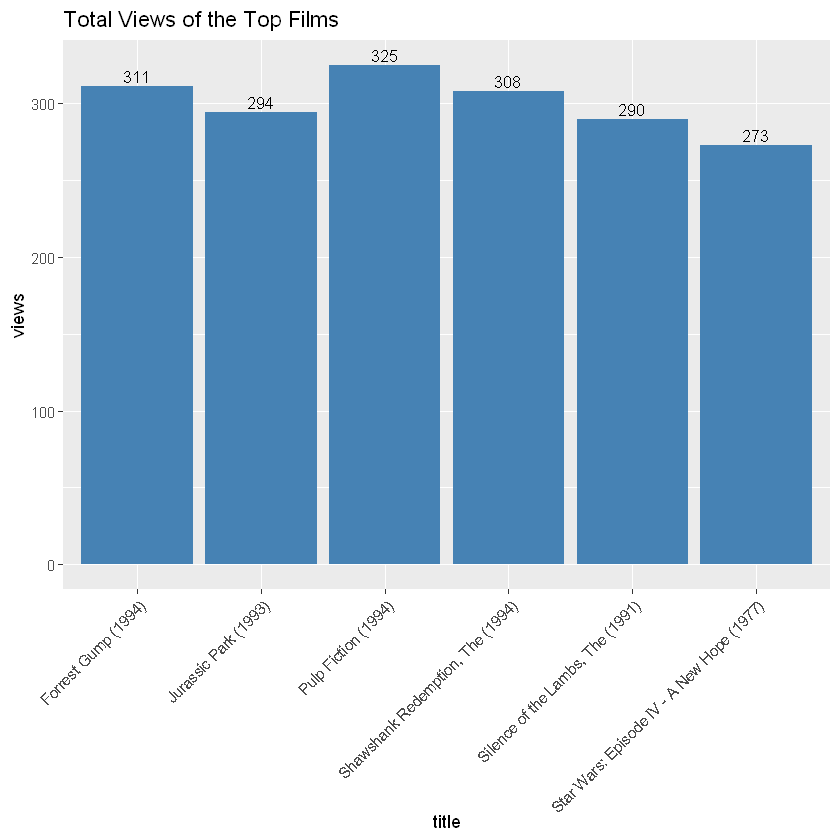

In [32]:
ggplot(table_views[1:6, ], aes(x = title, y = views)) +
  geom_bar(stat="identity", fill = 'steelblue') +
  geom_text(aes(label=views), vjust=-0.3, size=3.5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Total Views of the Top Films")

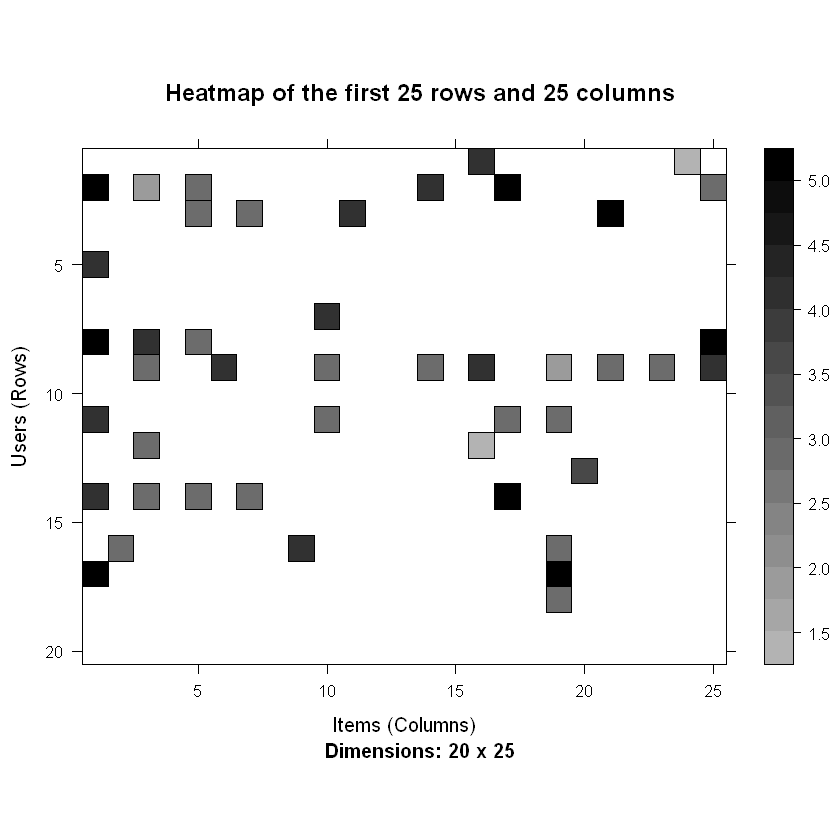

In [33]:
#Heat Map of movie ratings
image(ratingMatrix[1:20, 1:25], axes = FALSE, main = "Heatmap of the first 25 rows and 25 columns")

In [35]:
#Data Preparation
movie_ratings <- ratingMatrix[rowCounts(ratingMatrix) > 50,
                             colCounts(ratingMatrix) > 50]
movie_ratings

420 x 447 rating matrix of class 'realRatingMatrix' with 38341 ratings.

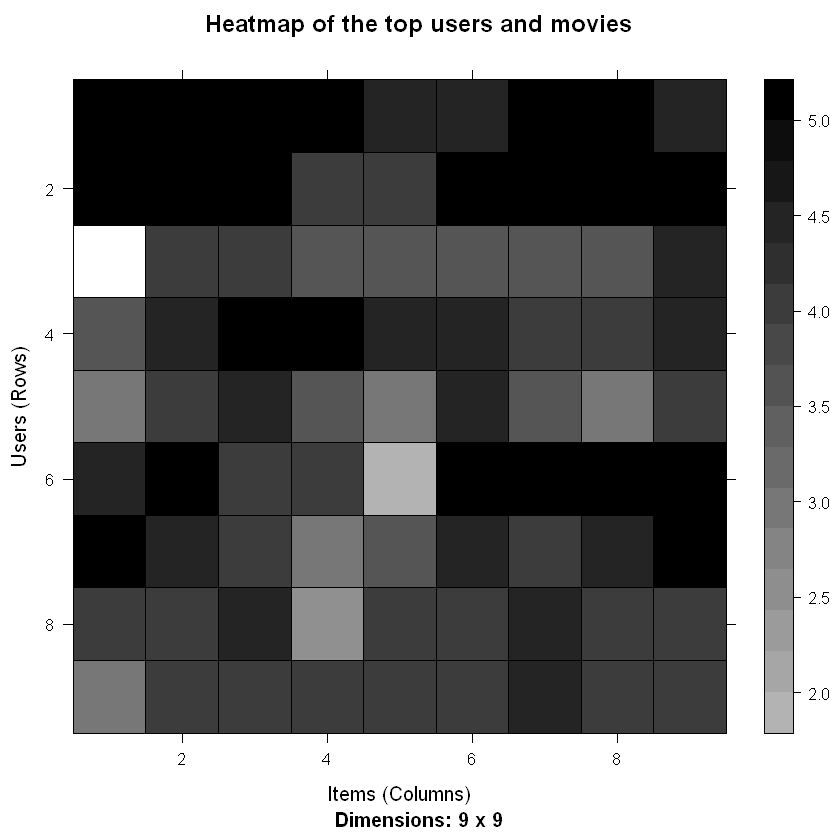

In [36]:
#Heat map of top users and movies
minimum_movies<- quantile(rowCounts(movie_ratings), 0.98)
minimum_users <- quantile(colCounts(movie_ratings), 0.98)
image(movie_ratings[rowCounts(movie_ratings) > minimum_movies,
                     colCounts(movie_ratings) > minimum_users],
main = "Heatmap of the top users and movies")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



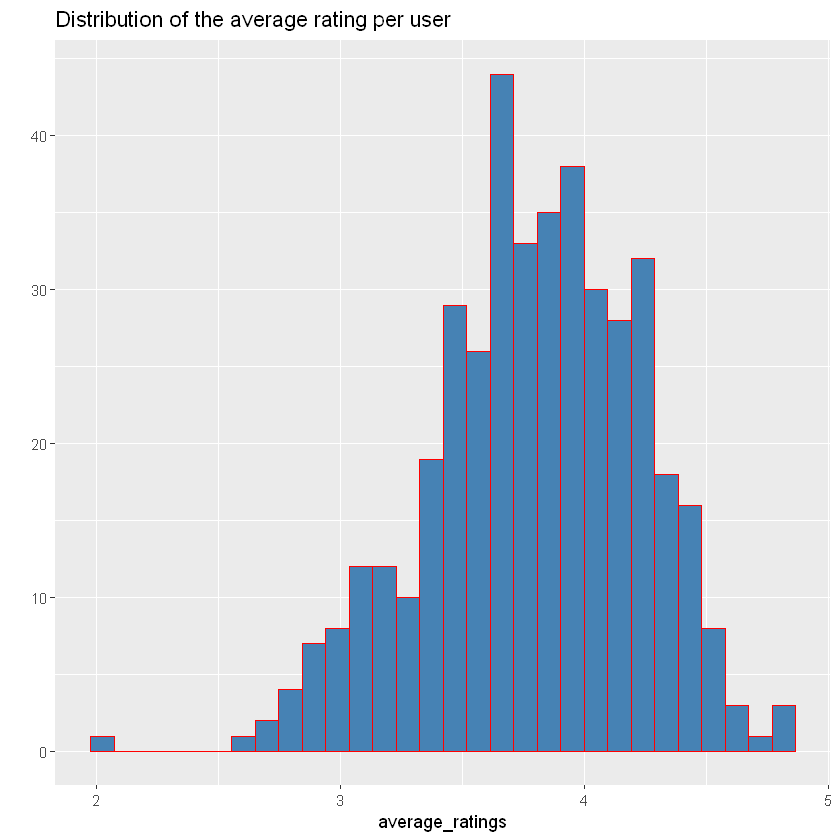

In [37]:
#Distribution of average rating by user
average_ratings <- rowMeans(movie_ratings)
qplot(average_ratings, fill=I("steelblue"), col=I("red")) +
  ggtitle("Distribution of the average rating per user")

[1] 0

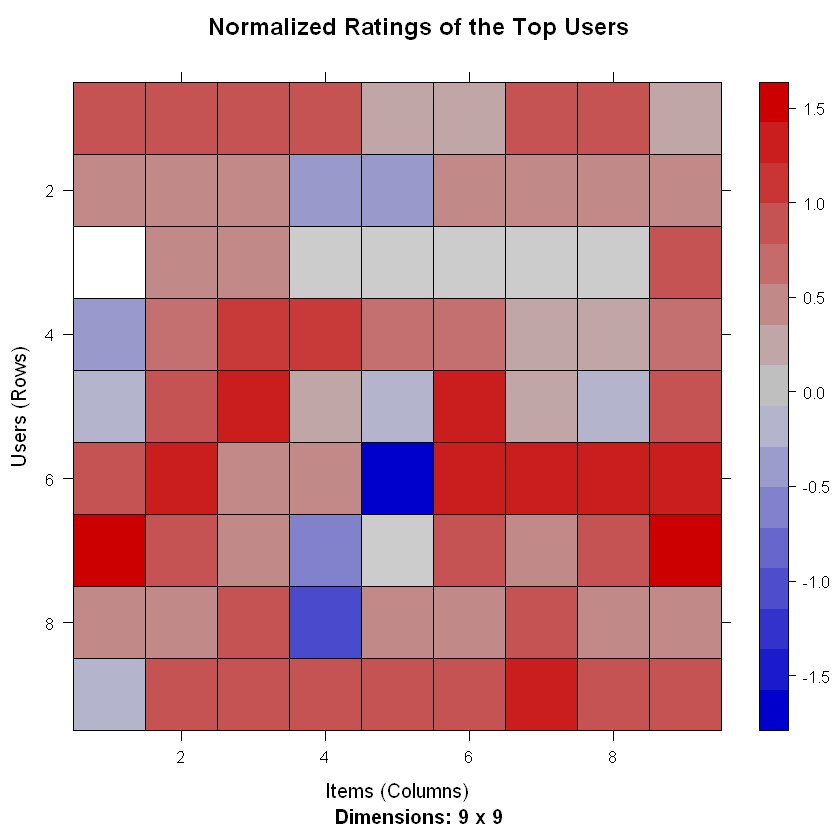

In [39]:
#Data Normalization
normalized_ratings <- normalize(movie_ratings)
sum(rowMeans(normalized_ratings) > 0.00001)
image(normalized_ratings[rowCounts(normalized_ratings) > minimum_movies,
                          colCounts(normalized_ratings) > minimum_users],
main = "Normalized Ratings of the Top Users")

Data Binarization: Binarizing the data means that we have two discrete values 1 and 0, which will allow our recommendation systems to work more efficiently. We will define a matrix that will consist of 1 if the rating is above 3 and otherwise it will be 0.

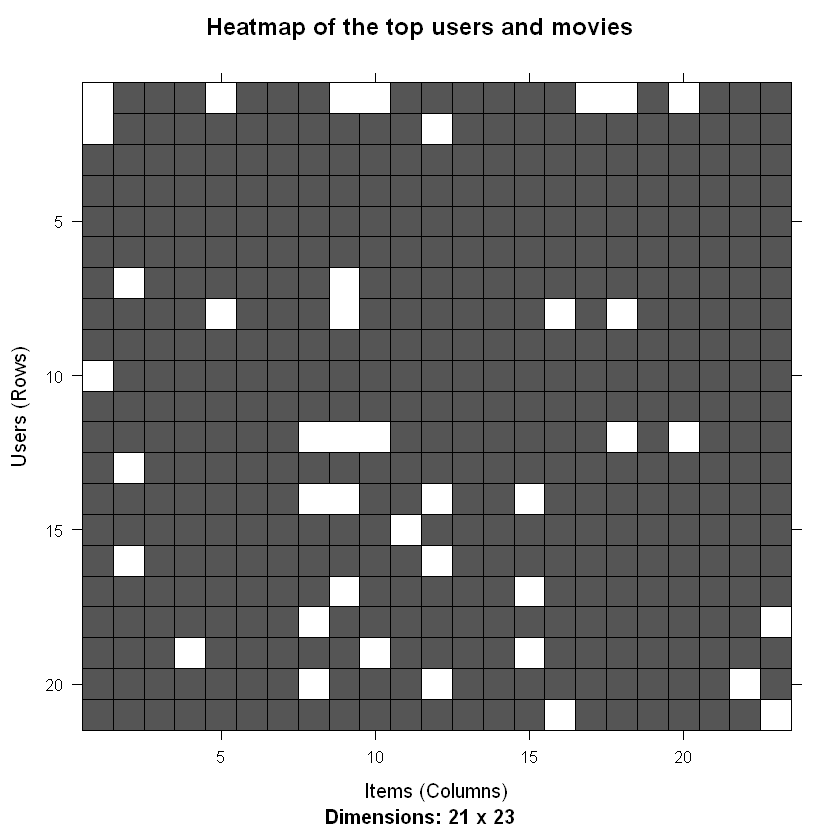

In [40]:
#Data Binaa=rization
binary_minimum_movies <- quantile(rowCounts(movie_ratings), 0.95)
binary_minimum_users <- quantile(colCounts(movie_ratings), 0.95)
#movies_watched <- binarize(movie_ratings, minRating = 1)
good_rated_films <- binarize(movie_ratings, minRating = 3)
image(good_rated_films[rowCounts(movie_ratings) > binary_minimum_movies,
colCounts(movie_ratings) > binary_minimum_users],
main = "Heatmap of the top users and movies")

Item Based Collaborative Filtering System. This type of collaborative filtering finds similarity in the items based on the people’s ratings of them. The algorithm first builds a similar-items table of the customers who have purchased them into a combination of similar items. This is then fed into the recommendation system.

The similarity between single products and related products can be determined with the following algorithm –

For each Item i1 present in the product catalog, purchased by customer C.
And, for each item i2 also purchased by the customer C.
Create record that the customer purchased items i1 and i2.
Calculate the similarity between i1 and i2.

We will build this filtering system by splitting the dataset into 80% training set and 20% test set.

In [41]:
sampled_data<- sample(x = c(TRUE, FALSE),
                      size = nrow(movie_ratings),
                      replace = TRUE,
                      prob = c(0.8, 0.2))
training_data <- movie_ratings[sampled_data, ]
testing_data <- movie_ratings[!sampled_data, ]

In [44]:
recommendation_system <- recommenderRegistry$get_entries(dataType ="realRatingMatrix")
recommendation_system$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

In [45]:
recommen_model <- Recommender(data = training_data,
                          method = "IBCF",
                          parameter = list(k = 30))
recommen_model
class(recommen_model)

Recommender of type 'IBCF' for 'realRatingMatrix' 
learned using 352 users.

[1] "Recommender"
attr(,"package")
[1] "recommenderlab"

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

[1] 447 447

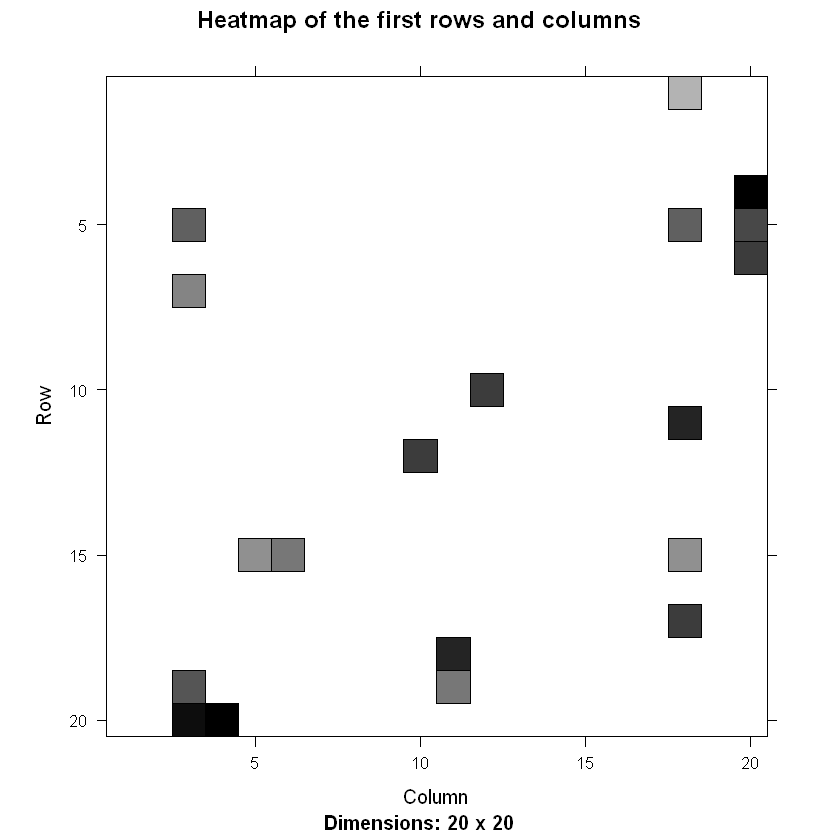

In [46]:
model_info <- getModel(recommen_model)
class(model_info$sim)
dim(model_info$sim)
top_items <- 20
image(model_info$sim[1:top_items, 1:top_items],
   main = "Heatmap of the first rows and columns")

sum_rows
 30 
447 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



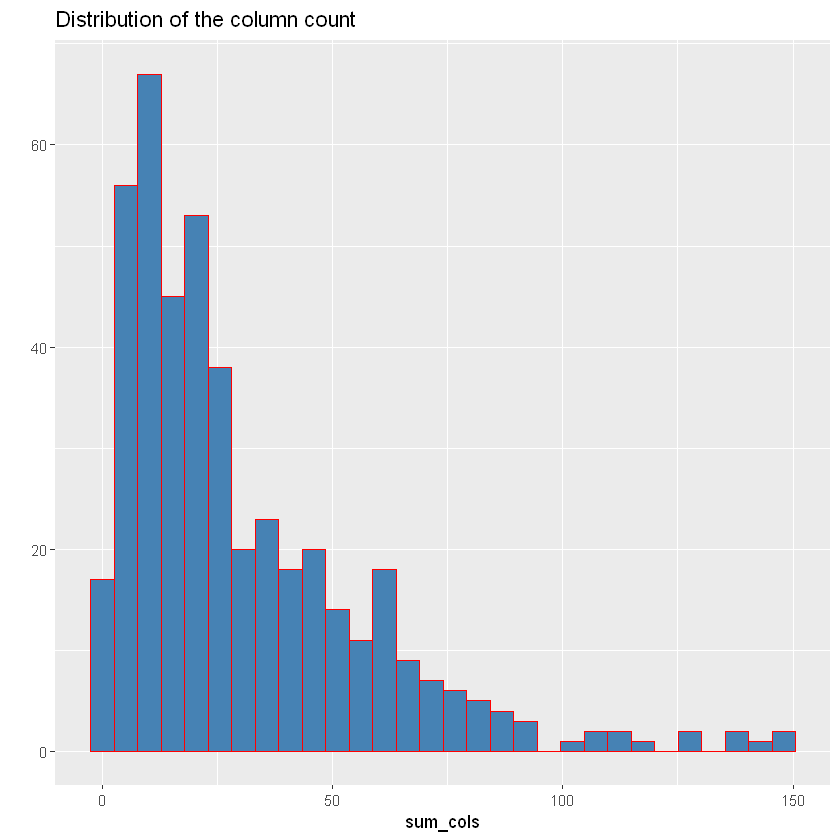

In [48]:
sum_rows <- rowSums(model_info$sim > 0)
table(sum_rows)
sum_cols <- colSums(model_info$sim > 0)
qplot(sum_cols, fill=I("steelblue"), col=I("red"))+ ggtitle("Distribution of the column count")

We will create a top_recommendations variable which will be initialized to 10, specifying the number of films to each user. We will then use the predict() function that will identify similar items and will rank them appropriately. Here, each rating is used as a weight. Each weight is multiplied with related similarities. Finally, everything is added in the end.

In [50]:
top_recommendations <- 10 # the number of items to recommend to each user
predicted_recommendations <- predict(object = recommen_model,
                          newdata = testing_data,
                          n = top_recommendations)
predicted_recommendations

Recommendations as 'topNList' with n = 10 for 68 users. 

In [51]:
user1 <- predicted_recommendations@items[[1]] # recommendation for the first user
movies_user1 <- predicted_recommendations@itemLabels[user1]
movies_user2 <- movies_user1
for (index in 1:10){
  movies_user2[index] <- as.character(subset(movie_data,
                                         movie_data$movieId == movies_user1[index])$title)
}
movies_user2

[1] "Three Musketeers, The (1993)"            
 [2] "Lock, Stock & Two Smoking Barrels (1998)"
 [3] "Back to the Future Part II (1989)"       
 [4] "Bridge on the River Kwai, The (1957)"    
 [5] "Toy Story 2 (1999)"                      
 [6] "Witness (1985)"                          
 [7] "Jungle Book, The (1967)"                 
 [8] "Cable Guy, The (1996)"                   
 [9] "First Knight (1995)"                     
[10] "Chinatown (1974)"

In [52]:
recommendation_matrix <- sapply(predicted_recommendations@items,
                      function(x){ as.integer(colnames(movie_ratings)[x]) }) # matrix with the recommendations for each user
#dim(recc_matrix)
recommendation_matrix[,1:4]

552,1,551,1625
2542,5,553,2424
2011,6,653,1246
1250,17,1028,1197
3114,25,1608,110
1674,34,2054,150
2078,39,2353,231
784,48,2502,253
168,111,2761,551
1252,185,3052,553
